JupShow
=========

A class for managing plots and images on jupyter-notebook. 



In [1]:

import matplotlib.pyplot as plt
import pylab
import numpy as np
from scipy.misc import imresize

class JupShow:
    #constructor
    def __init__(self, ncols = 3,figsize =  (12,8),imwidth = []):
        self.imgs = []
        self.titles = []
        self.ncols = ncols
        self.imwidth = []   
        self.figsize= figsize
        return
    #append images to list of images to be displayed
    def imshow_add(self,img,title = ""):
        self.imgs.append(img)
        self.titles.append(title)
        return 
    #sets figure size. Ex figsize = (12,8)
    def set_figsize(self,figsize):
        self.figsize = figsize
        return
    
    #sets image width
    def set_imwidth(self,imwidth):
        self.imwidth = imwidth
        return    
    #converts matplotlib image object to numpy array
    def fig2img(self,figure):
        # draw the renderer
        figure.canvas.draw ( )
        # Get the RGB buffer from the figure
        w,h = figure.canvas.get_width_height()
        buf = np.fromstring ( figure.canvas.tostring_rgb(), dtype=np.uint8 )
        buf.shape = ( h, w, 3 )
        return buf

    #displays image in subplot format 
    def imshow(self):
        number_of_subplots = len(self.imgs)
        nlines = number_of_subplots/self.ncols + 1
        plt.close("all")
        figure1 = plt.figure(figsize = (12,8))
        for i,v in enumerate(xrange(number_of_subplots)):
            v = v+1
            ax1 = pylab.subplot(nlines,self.ncols,v)
            img = self.imgs[i]
            #Test if its a numpy.array or matplotlib plot
            #  if it is a plot it converts to numpy.array
            try:
                img.shape
            except:
                img = self.fig2img(img)
            #Rescale images if necessary
            if self.imwidth:
                if (img.ndim==2): 
                    h,w = img.shape
                else:
                    h,w,_ = img.shape
                height = int(self.imwidth*1.0*h/w)    
                img = imresize(img,(height,self.imwidth))
            #display images: gray or color depending on the image dimension
            if img.ndim == 2:
                ax1.imshow(img, cmap='Greys_r')
            else:
                ax1.imshow(img)
            #removes axis and writes images titles
            ax1.set_xticks([]) 
            ax1.set_yticks([]) 
            ax1.set_xlabel(self.titles[i])
            ax1.set_frame_on(False)
        # empties buffer
        self.imgs = []
        self.titles = []
        plt.show(figure1)
        return

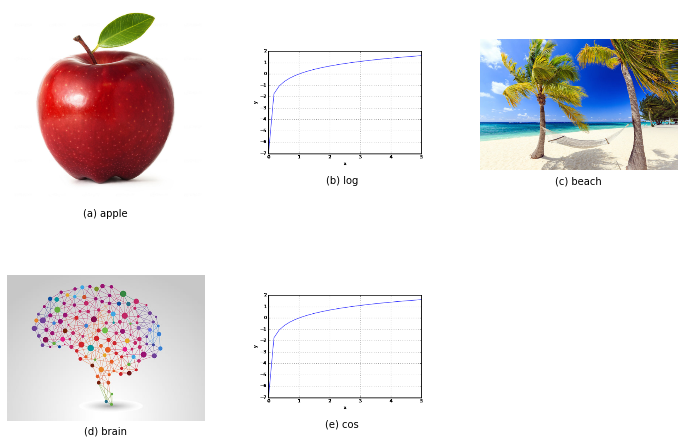

In [2]:
from PIL import Image
import urllib2 as urllib

%matplotlib inline

display = JupShow()

display.set_imwidth(512)

#Apple image
fd = urllib.urlopen("https://staticdelivery.nexusmods.com/mods/110/images/74627-0-1459502036.jpg")
img = np.asarray(Image.open(fd))
display.imshow_add(img,"(a) apple")

#Log plot
x = np.linspace(0.001,5,30)
y = np.log(x)

fig = plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
display.imshow_add(fig,"(b) log")

#Beach image
fd2 =  urllib.urlopen("http://www.planetware.com/photos-large/CAY/caribbean-best-beaches-seven-mile-beach.jpg")
img2 = np.asarray(Image.open(fd2))
display.imshow_add(img2,"(c) beach")

# Brain image
fd3 = urllib.urlopen("https://s-media-cache-ak0.pinimg.com/originals/48/af/10/48af108a43d588f2e87aad9e94e3cfa7.jpg")
img3 = np.asarray(Image.open(fd3))
display.imshow_add(img3,"(d) brain")

# Cosine plot
fig = plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
display.imshow_add(fig,"(e) cos")

#Displaying all images
display.imshow()








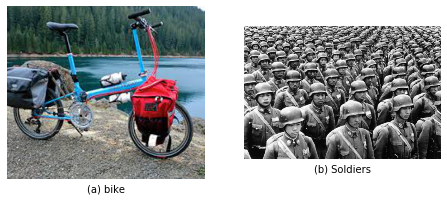

In [3]:
#Bike image
fd4 =  urllib.urlopen("https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTsxq743pzVv6AaHNL704JvspkZwQ_GCSQ85bcYslhNjhdmlk_7")
img4 = np.asarray(Image.open(fd4))
display.imshow_add(img4,"(a) bike")

# Soldiers image
fd5 = urllib.urlopen("https://cdn.theatlantic.com/assets/media/img/photo/2011/07/world-war-ii-conflict-spreads-around-the-globe/w01_07110168/main_900.jpg?1420520331")
img5 = np.asarray(Image.open(fd5))
display.imshow_add(img5,"(b) Soldiers")

#Displaying all images
display.imshow()